In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

**Creating random data points**

In [2]:
np.random.seed(14)
n = 40 #datapoints
p = 2 #features
k = 3 #num of clusters

X = np.random.random((n,p))

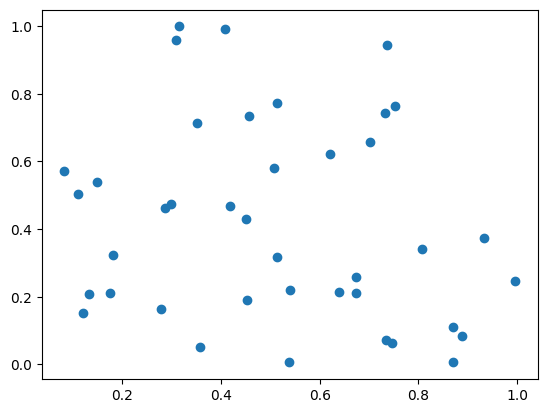

In [3]:
plt.scatter(X[:,0], X[:,1])

In [4]:
#initialize centers
#while not converged:
#  update cluster membership
#  update centroids

In [5]:
#initialize centers
#  pick an initial guess for the center within our points
centers = X[np.random.choice(n, k, replace = False)]

In [6]:
#euclidean distance formula
((X[0] - centers[0])**2).sum()**0.5

0.4862964063615288

In [7]:
#this works because of broadcasting
((X-centers[0])**2).sum(axis=1)**0.5

array([0.48629641, 0.90690435, 0.49714814, 0.44309075, 0.51299577,
       0.71458606, 0.65601763, 0.63444289, 0.83241629, 0.69329662,
       0.85563223, 0.19200601, 0.61378302, 0.61100154, 0.19408797,
       0.88318662, 0.77376997, 0.66623156, 0.5726295 , 0.46329404,
       0.32173012, 0.5141303 , 0.53747324, 0.18241012, 0.76530468,
       0.29717319, 0.29449405, 0.9218017 , 0.        , 0.41673303,
       0.52450981, 0.05387286, 0.34944637, 0.34792318, 0.75677839,
       0.37690523, 0.4054013 , 0.60206634, 0.30956743, 0.07311428])

In [8]:
distances = np.zeros((n,k))
for i in range(k):
   distances[:,i] = ((X-centers[i])**2).sum(axis=1)**0.5
distances

array([[0.48629641, 0.74791069, 0.76769666],
       [0.90690435, 0.13524426, 0.33154596],
       [0.49714814, 0.99614158, 0.97892848],
       [0.44309075, 0.3464103 , 0.31347187],
       [0.51299577, 0.26124829, 0.21538138],
       [0.71458606, 0.28624578, 0.42983464],
       [0.65601763, 0.21521753, 0.        ],
       [0.63444289, 0.16491496, 0.2443443 ],
       [0.83241629, 0.36314167, 0.53914029],
       [0.69329662, 0.70081341, 0.78679457],
       [0.85563223, 0.13281978, 0.34760758],
       [0.19200601, 0.60789768, 0.52632209],
       [0.61378302, 0.2086638 , 0.2851861 ],
       [0.61100154, 0.59638155, 0.67103989],
       [0.19408797, 0.62142956, 0.47680156],
       [0.88318662, 0.14252875, 0.35715303],
       [0.77376997, 0.        , 0.21521753],
       [0.66623156, 0.68032852, 0.76139786],
       [0.5726295 , 0.98883007, 0.9941742 ],
       [0.46329404, 0.32085927, 0.20342955],
       [0.32173012, 0.76268074, 0.73325311],
       [0.5141303 , 0.38927671, 0.18713084],
       [0.

**Using scipy**

In [9]:
distances = cdist(X,centers)
closest = np.argmin(distances, axis=1)

In [10]:
X[closest == 0].mean(axis=0)

array([0.36876116, 0.59816163])

In [11]:
for i in range(k):
    centers[i, :] = X[closest == i].mean(axis=0)
centers

array([[0.36876116, 0.59816163],
       [0.79410551, 0.21993471],
       [0.446594  , 0.15870067]])

**Defining and implementing our actual function**

In [12]:
np.random.seed(45609)
#initialize centers
centers = X[np.random.choice(n, k, replace = False)]
closest = np.zeros(n).astype(int)

#while not converged:
while True:
    old_closest = closest.copy()
    print(closest)
    distances = cdist(X,centers)
    #  update cluster membership
    closest = np.argmin(distances, axis=1)

    #  update centroids
    for i in range(k):
        centers[i, :] = X[closest == i].mean(axis=0)

    if all(closest == old_closest):
        break

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 1 0 0 0 2 2 2 2 0 2 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0
 2 0 0]
[0 1 0 0 2 2 2 2 2 0 1 0 2 0 0 1 2 0 0 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0
 2 0 0]
[0 1 0 2 2 2 2 2 1 0 1 0 2 0 0 1 2 0 0 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 2 2 0
 2 0 0]
[0 1 0 2 2 1 2 2 1 0 1 0 2 0 0 1 1 0 0 2 0 2 0 0 0 2 2 1 0 0 0 0 2 0 2 2 0
 2 0 0]
[0 1 0 2 2 1 2 1 1 0 1 0 1 0 2 1 1 0 0 2 0 2 0 0 0 2 2 1 0 0 0 0 2 0 1 2 0
 2 0 0]
[0 1 0 2 2 1 2 1 1 0 1 0 1 0 2 1 1 0 0 2 0 2 0 0 0 2 2 1 0 0 0 0 2 0 1 2 0
 1 0 0]


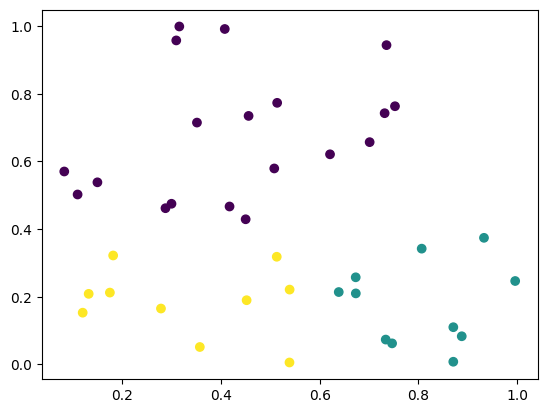

In [13]:
plt.scatter(X[:,0],X[:,1], c=closest)